#### 【コード解説】畳み込みニューラルネットワーク（CNN）サンプルコード
https://child-programmer.com/ai/cnn-mnist-basic-samplecode-description/

In [1]:
#1 ライブラリのインポートなど

import keras
from keras.datasets import mnist        #0〜9の手書き文字MNISTのデータセット
from keras.models import Sequential    #モデル層を積み重ねる
from keras.layers import Conv2D        #2次元畳み込み層のモジュール
from keras.layers import MaxPooling2D  #2次元最大プーリング層のモジュール
from keras.layers import Dense          #全結合層
from keras.layers import Dropout        #ドロップアウト
from keras.layers import Flatten         #入力を平滑化（平坦化：次元削減）
from keras.optimizers import Adam     #Adaptive moment estimation : 学習の最適化手法の1つ。最適化関数
import time

In [2]:
#2 画像データの読み込みと、データ形式の設定・正規化

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 訓練用画像データ6万枚・テスト用画像データ1万枚
# 縦28×横28ピクセル・グレースケール（白黒画像）
# 各ピクセルは黒から白までの変化を0〜255で表現

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# 「縦28×横28ピクセル」の「グレースケール（白黒）」の「x_train.shape[0]：画像データが6万枚」
# カラー画像の場合は(x_train.shape[0], 28, 28, 3)
# x_train = x_train.reshape(-1, 28, 28, 1) と「-1」を指定すると、適当な値を推測して調整してくれるようです

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')/255
# 訓練用の画像データを正規化
# 黒から白までの変化を0〜255で表現しているので、255で割ることでデータを0〜1の範囲に正規化
# float型にすることで実数値で表現
# 正規化前「0〜255」 正規化実施「0.0〜1.0」（実数値）

x_test = x_test.astype('float32')/255

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#3 ラベルデータをOne-hotベクトルに変更

y_train = keras.utils.to_categorical(y_train, 10)
# 訓練用のラベルデータの整数値を2値クラスの行列に変換
# 例「整数 1」を「0,1,0,0,0,0,0,0,0,0」と表現。One-hotベクトル（1-of-k表記法）

# (y_train, 10）：0〜9までのため10クラス
# このような形式にすることで、出力結果が「0.1,0,0,0,0,0,0.8,0,0.1,0」（0の確率10%。6の確率80%。10の確率10%）を得られる
# 画像データが機械学習モデルで、どういう判定結果となっているか？という情報を取得できる


y_test = keras.utils.to_categorical(y_test, 10)

In [4]:
#4 機械学習（人工知能）モデルの作成
#「Conv2D」を使ってディープラーニング技術でおなじみの「畳み込みニューラルネットワーク」（CNN）を実装

model = Sequential()
# モデル層を積み重ねる形式の記述方法
# .addメソッドで簡単に層を追加できます

model.add(Conv2D(16, (3, 3), padding='same',
          input_shape=(28, 28, 1), activation='relu'))
# 空間フィルタ – 畳み込み演算層

# Conv2D(16, (3, 3) : 「3×3」の大きさのフィルタを16枚使うという意味。「5×5」「7×7」などと、中心を決められる奇数が使いやすいようです。
# フィルタ数は、「16・32・64・128・256・512枚」などが使われる傾向にあるようですが、複雑そうな問題ならフィルタ数を多めに、簡単そうな問題ならフィルタ数を少なめで試してみるようです

# padding=’same’ ： 今回は出力画像のサイズが変わらないように「padding=’same’」でパディングを実施
# フィルタを適用前に0などの要素で周囲を増やす（ゼロパディング）
# その他にも「stride=(1,1)」（横に1ピクセル・縦に1ピクセルずつフィルタを適用）などとストライドの追加も可能
# strideを指定しない場合（デフォルト）は縦・横1ピクセルずつフィルタが適用されるようです

# activation=’relu’ ： 活性化関数「ReLU（Rectified Linear Unit）- ランプ関数」
# フィルタ後の画像に実施。入力が0以下の時は出力0。入力が0より大きい場合はそのまま出力する


model.add(MaxPooling2D(pool_size=(2, 2)))               
# 「2×2」の大きさの最大プーリング層。入力画像内の「2×2」の領域で最大の数値を出力する

model.add(Conv2D(128, (3, 3), activation='relu'))
# 空間フィルタ – 畳み込み演算層。「3×3」の大きさのフィルタを128枚使う。

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                

model.add(Dropout(0.5))                                   
# ドロップアウト – 過学習予防。今回は、全結合の層とのつながりを「50%」無効化しています

model.add(Flatten())
# 平坦化（次元削減） – 1次元ベクトルに変換する

model.add(Dense(128, activation='relu'))
# 全結合層。出力128

model.add(Dropout(0.25))                                 

model.add(Dense(10, activation='softmax'))
# 全結合層。出力10（0~9の10クラス判定のため）
# Denseのところで、畳み込みニューラルネットワーク（CNN）の最終的な全結合層の出力次元数の決め方は、判定するクラス数を指定します
# 上記のコードの場合「0〜9」までの数字を判定するため、全部で「0・1・2・3・4・5・6・7・8・9」の「10」クラスになります
# そのため、最終的な全結合層の出力次元数を「10」にします
# Softmax関数で総和が1となるように、各出力の予測確率を計算
# 例「0.1,0,0,0,0,0,0.8,0,0,0.1」（0の確率10%。6の確率80%。9の確率10%）

In [5]:
#5 損失関数・最適化関数・評価関数などを指定してモデルをコンパイル

model.compile(loss='categorical_crossentropy',  # 損失化関数 – 交差エントロピー誤差を指定。今回のような分類問題（識別問題）などで使われる
              optimizer=Adam(),                # 最適化関数 – Adam（Adaptive moment estimation）を指定。学習の最適化手法の1つ
              metrics=['accuracy']              # 評価関数 – 訓練時とテスト時にモデルにより評価される評価関数。学習の評価として正解率も計算
              )

In [6]:
#6 処理を始めた時間

start_time = time.time()

In [7]:
#7 学習の実行

history = model.ﬁt(x_train, y_train,
                   batch_size=1024,   # サブセットに分けて学習する理由 : 学習する際の異常値の影響を小さくするため
                   epochs=20,
                   verbose=1,          # ログ出力の指定。「0」だとログが出ない
                   validation_data=(x_test, y_test)
                   )

Epoch 1/20
59/59 [==============================] - 284s 5s/step - loss: 0.5034 - accuracy: 0.8411 - val_loss: 0.0843 - val_accuracy: 0.9729
Epoch 2/20
59/59 [==============================] - 279s 5s/step - loss: 0.0993 - accuracy: 0.9696 - val_loss: 0.0473 - val_accuracy: 0.9845
Epoch 3/20
59/59 [==============================] - 280s 5s/step - loss: 0.0699 - accuracy: 0.9786 - val_loss: 0.0384 - val_accuracy: 0.9869
Epoch 4/20
59/59 [==============================] - 279s 5s/step - loss: 0.0537 - accuracy: 0.9833 - val_loss: 0.0334 - val_accuracy: 0.9883
Epoch 5/20
59/59 [==============================] - 279s 5s/step - loss: 0.0447 - accuracy: 0.9867 - val_loss: 0.0265 - val_accuracy: 0.9904
Epoch 6/20
59/59 [==============================] - 279s 5s/step - loss: 0.0392 - accuracy: 0.9879 - val_loss: 0.0249 - val_accuracy: 0.9919
Epoch 7/20
59/59 [==============================] - 279s 5s/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0210 - val_accuracy: 0.9934
Epoch 8/20
59

In [8]:
#8 モデルの評価

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
# score[0] – テストデータの交差エントロピー誤差を表示

print('Test accuracy:', score[1])
# score[1] – テストデータの正解率を表示

print('Computation time:{0:.3f} sec'.format(time.time() - start_time))
# 計算処理にかかった時間を表示
# {0:.3f} ： {通し番号：float型の小数点以下3桁まで表示}

Test loss: 0.022559309378266335
Test accuracy: 0.9922999739646912
Computation time:5915.502 sec


#### Python・KerasでCNN機械学習
自作・自前画像のオリジナルデータセットで画像認識入門

https://child-programmer.com/ai/cnn-originaldataset-samplecode/

https://child-programmer.com/ai/cnn-originaldataset-samplecode-description/


In [43]:
#!rm -r /content/dataset/

In [44]:
# 事前準備 ： データセットの用意

#!wget https://github.com/jiai-edu/teaching_ep_elementary-phython/blob/master/datasets/kerasCNN/kerasCNN_dataset.zip
#!curl -OL https://github.com/jiai-edu/teaching_ep_elementary-phython/blob/master/datasets/kerasCNN/kerasCNN_dataset.zip
!unzip kerasCNN_dataset.zip
## unzipが、手動アップロードしたファイルには実行できるのに、ダウンロードしてきたものにはよくわからないエラーになって解凍できない

Archive:  kerasCNN_dataset.zip
   creating: dataset/
  inflating: __MACOSX/._dataset      
  inflating: dataset/.DS_Store       
  inflating: __MACOSX/dataset/._.DS_Store  
   creating: dataset/cross/
   creating: dataset/circle/
  inflating: dataset/cross/8.png     
  inflating: __MACOSX/dataset/cross/._8.png  
  inflating: dataset/cross/9.png     
  inflating: __MACOSX/dataset/cross/._9.png  
  inflating: dataset/cross/14.png    
  inflating: __MACOSX/dataset/cross/._14.png  
  inflating: dataset/cross/15.png    
  inflating: __MACOSX/dataset/cross/._15.png  
  inflating: dataset/cross/17.png    
  inflating: __MACOSX/dataset/cross/._17.png  
  inflating: dataset/cross/16.png    
  inflating: __MACOSX/dataset/cross/._16.png  
  inflating: dataset/cross/12.png    
  inflating: __MACOSX/dataset/cross/._12.png  
  inflating: dataset/cross/13.png    
  inflating: __MACOSX/dataset/cross/._13.png  
  inflating: dataset/cross/11.png    
  inflating: __MACOSX/dataset/cross/._11.png  
  infla

In [31]:
'''
gitHub経由でダウンロードしてくると、なぜかload_img()で画像として認識されないエラーが発生した

!mkdir dataset/ dataset/circle/ dataset/cross/

for i in range(1, 26):
  !wget -P /content/dataset/circle/ https://github.com/jiai-edu/teaching_ep_elementary-phython/tree/master/datasets/kerasCNN/circle/{i}.png

for i in range(1, 26):
  !wget -P /content/dataset/cross/ https://github.com/jiai-edu/teaching_ep_elementary-phython/tree/master/datasets/kerasCNN/cross/{i}.png

--2020-12-02 05:35:14--  https://github.com/jiai-edu/teaching_ep_elementary-phython/tree/master/datasets/kerasCNN/circle/1.png
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/jiai-edu/teaching_ep_elementary-phython/blob/master/datasets/kerasCNN/circle/1.png [following]
--2020-12-02 05:35:14--  https://github.com/jiai-edu/teaching_ep_elementary-phython/blob/master/datasets/kerasCNN/circle/1.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/dataset/circle/1.png’

1.png                   [ <=>                ]  89.98K  --.-KB/s    in 0.08s   

2020-12-02 05:35:14 (1.12 MB/s) - ‘/content/dataset/circle/1.png’ saved [92142]

--2020-12-02 05:35:14--  https://github.com/jiai-edu/teaching_ep_elementary-phython/tree/master/datasets/ker

In [ ]:
## 「判別したい "ラベル情報（フォルダ名）" と "画像" をセットにしたフォルダ」 をアップロードすると動くようにしてあります
# 今回のプログラムを動かすために必要なデータセットの構造例（機械学習用データセットの作り方）
# dataset（フォルダ名）
#  -- circle（datasetフォルダ内のフォルダ名 - ラベル情報）
#  -- cross（datasetフォルダ内のフォルダ名 - ラベル情報）
# 画像の大きさは、特に指定はありません。バラバラの大きさでも実行できるようですが、必要に応じて調整してみてください

In [9]:
## 学習
#1 ライブラリのインポート等

import keras
import glob   # 引数に指定されたパターンに合うファイルパス名を取得出来る。(‘ *.png’) 等
import numpy as np
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import load_img
# 画像ファイルをPIL 形式（Pillow：Python Imaging Libraryから分岐した画像ライブラリのデータフォーマット）で読み込む

from keras.preprocessing.image import img_to_array  # PIL 形式からndarrayへ変換
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.utils import plot_model    # 学習モデルの可視化が出来る
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time

In [35]:
#2 各種設定 

train_data_path = '/content/dataset'
# データセットのフォルダ名を入力

image_size = 28
# 「28」を指定した場合、縦28横28ピクセルの画像に変換

color_setting = 1
# データセット画像のカラー ： 「1」はモノクロ・グレースケール 「3」はカラー

folder = ['circle', 'cross']
# データセット画像のフォルダ名（クラス名）を半角英数で入力

class_number = len(folder)
print('今回のデータで分類するクラス数は「', str(class_number), '」です。')

今回のデータで分類するクラス数は「 2 」です。


In [45]:
#3 データセットの読み込みとデータ形式の設定・正規化・分割 

X_image = []  
Y_label = [] 
for index, name in enumerate(folder):
  read_data = train_data_path + '/' + name
  files = glob.glob(read_data + '/*.png')   # png形式のファイルを利用する場合のサンプル
  print('--- 読み込んだデータセットは', read_data, 'です。')

  for i, file in enumerate(files):  
    if color_setting == 1:
      #print(file)
      img = load_img(file, color_mode = 'grayscale' ,target_size=(image_size, image_size))  
    elif color_setting == 3:
      img = load_img(file, color_mode = 'rgb' ,target_size=(image_size, image_size))
    array = img_to_array(img)
    X_image.append(array)
    Y_label.append(index)

X_image = np.array(X_image)
Y_label = np.array(Y_label)

X_image = X_image.astype('float32') / 255

Y_label = keras.utils.to_categorical(Y_label, class_number)
# このような形式にすることで、出力結果が「0.1 , 0.9」（「0：circle」の確率10%。「1：cross」の確率90%）を得られる
# 画像データが機械学習モデルで、どういう判定結果となっているか？という情報を取得できる

train_images, valid_images, train_labels, valid_labels = train_test_split(X_image, Y_label, test_size=0.10)
x_train = train_images
y_train = train_labels
x_test = valid_images
y_test = valid_labels

--- 読み込んだデータセットは /content/dataset/circle です。
/content/dataset/circle/11.png
/content/dataset/circle/6.png
/content/dataset/circle/4.png
/content/dataset/circle/8.png
/content/dataset/circle/16.png
/content/dataset/circle/9.png
/content/dataset/circle/21.png
/content/dataset/circle/20.png
/content/dataset/circle/7.png
/content/dataset/circle/3.png
/content/dataset/circle/25.png
/content/dataset/circle/5.png
/content/dataset/circle/18.png
/content/dataset/circle/12.png
/content/dataset/circle/22.png
/content/dataset/circle/14.png
/content/dataset/circle/17.png
/content/dataset/circle/19.png
/content/dataset/circle/15.png
/content/dataset/circle/24.png
/content/dataset/circle/2.png
/content/dataset/circle/23.png
/content/dataset/circle/13.png
/content/dataset/circle/1.png
/content/dataset/circle/10.png
--- 読み込んだデータセットは /content/dataset/cross です。
/content/dataset/cross/11.png
/content/dataset/cross/6.png
/content/dataset/cross/4.png
/content/dataset/cross/8.png
/content/dataset/cross/16.pn

In [ ]:
#4 機械学習（人工知能）モデルの作成 – 畳み込みニューラルネットワーク（CNN）・学習の実行等

model = Sequential()
model.add(Conv2D(16, (3, 3),
                 padding='same',
                 input_shape=(image_size, image_size, color_setting),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))               
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                
model.add(Dropout(0.5))                                   
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))                                 
model.add(Dense(class_number, activation='softmax'))

model.summary()
plot_model(model, to_file='model.png')
# 機械学習モデルの流れのイメージを保存します
# サンプルコードでは「model.png」という名前のpng画像が、実行中のGoogle Colaboratoryの「ファイル」内に保存されます

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

start_time = time.time()

history = model.fit(x_train, y_train,
                    batch_size=2,   # 必要に応じて値を変更
                    epochs=5,       # 必要に応じて値を変更
                    verbose=1,      # 1 : ログ出力あり  0 : ログ出力なし
                    validation_data=(x_test, y_test))

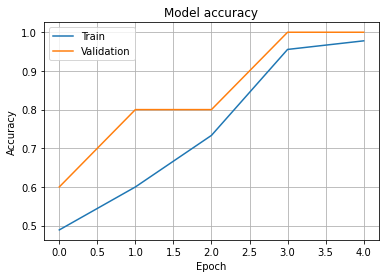

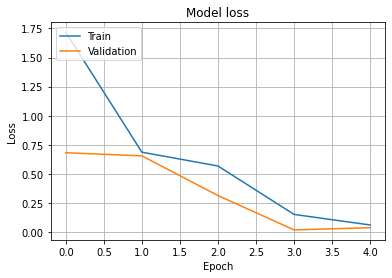

Loss: 0.03712456300854683 （損失関数値 - 0に近いほど正解に近い）
Accuracy: 100.0 % （精度 - 100% に近いほど正解に近い）
Computation time（計算時間）:152.927 sec（秒）


In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# 「accuracy：訓練データ（train data）の精度」「val_accuracy：検証データ（validation data）での精度」の記録をグラフ上にプロット

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
# Train・Validationのラベルを左上にプロット

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

open('cnn_model.json',"w").write(model.to_json())
# 機械学習モデルの保存
# 今回は「cnn_model.json」という名前で保存しています
# 実行中のGoogle Colaboratoryの「ファイル」内に保存されます

model.save_weights('cnn_weights.h5')
# 機械学習モデルの重みを保存
# 今回は「cnn_weights.h5」という名前で保存しています
# 実行中のGoogle Colaboratoryの「ファイル」内に保存されます

score = model.evaluate(x_test, y_test, verbose=0)

print('Loss:', score[0], '（損失関数値 - 0に近いほど正解に近い）') 
# 検証用データの交差エントロピー誤差を表示

print('Accuracy:', score[1] * 100, '%', '（精度 - 100% に近いほど正解に近い）') 
# 最終的な検証用データの正解率（精度）を表示します。今回は100を掛けて%表示しています

print('Computation time（計算時間）:{0:.3f} sec（秒）'.format(time.time() - start_time))

In [48]:
## 判定
#1 ライブラリのインポート等

import cv2 
import matplotlib.pyplot as plt
import numpy as np
from keras.models import model_from_json  # json形式のモデルの読み込みに利用

In [53]:
#2 各種設定

#画像認識したい画像ファイル名（認識したい画像ファイルを1つアップロードしてください）
#recognise_image = '1.png'
recognise_image = '2.png'

In [ ]:
folder = ['○：丸', '×：バツ']  #今回は日本語の表示にしたかったので、folder = ['circle', 'cross'] の順番で日本語にしています。

image_size = 28
# 「28」を指定した場合、縦28横28ピクセルの画像に変換
# 学習時と同じにする。

color_setting = 1
# 画像認識する画像のカラー。「1」はモノクロ・グレースケール。「3」はカラー
# 学習時と同じにする。

In [50]:
#3 各種読み込み

model = model_from_json(open('cnn_model.json', 'r').read())
#機械学習の「モデル」の読み込み。「cnn_model.json」のファイルを読み込みます

model.load_weights('cnn_weights.h5')
# 機械学習の「重み」の読み込み。「cnn_weights.h5」のファイルを読み込みます

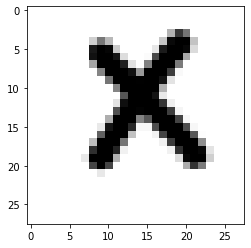

In [54]:
#4 画像の表示・各種設定等

img = cv2.imread(recognise_image, 0)
#モノクロ・グレースケールの場合は「0」  カラーの場合は「1」

img = cv2.resize(img, (image_size, image_size))
plt.imshow(img)

plt.gray()
# カラーの場合は「plt.gray()」をコメントアウト
# モノクロ・グレースケールの場合は「plt.gray()」が無いと変な色になります

plt.show()

img = img.reshape(image_size, image_size, color_setting).astype('float32')/255
# 学習した際の画像データに合わせる

In [55]:
#5 予測と結果の表示等

prediction = model.predict(np.array([img]),
                           batch_size=2,  # 学習した際の値に合わせる
                           verbose=1)
result = prediction[0]

for i, acc in enumerate(result):
  print('画像認識AIは「', folder[i], '」の確率を', int(acc * 100), '% と予測しました。')
# 予測結果の表示（確率）。今回は%表示にするために 100を掛けています

print('-------------------------------------------------------')
print('画像認識AI：○ or × の予測結果は、「', folder[result.argmax()],'」です。')
# 判別結果の表示
# 「result.argmax」で配列の最大要素のインデックスを返します
# （予測確率が一番高い正解ラベルを出力）

1/1 [==============================] - 0s 1ms/step
画像認識AIは「 ○：丸 」の確率を 0 % と予測しました。
画像認識AIは「 ×：バツ 」の確率を 99 % と予測しました。
-------------------------------------------------------
画像認識AI：○ or × の予測結果は、「 ×：バツ 」です。
